<a href="https://colab.research.google.com/github/yehuda-yu/Data_Science_Projects/blob/main/Diabetes_analysis_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Data Sciecne (71253) - Problem Set 5

In this problem set we'll work with data from diabetes patients and see which variables are related to each other.  

*** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn import linear_model
from scipy import stats

In [2]:
palette = ["#333C83", "#F24A72", "#FDAF75", "#EAEA7F"]
sns.set_theme(style="white",palette=palette,font_scale = 1.5)

In [3]:
# import dataset
file = "/content/diabetes.csv"
df = pd.read_csv(file)

## 1. Quantifying correlations between (continous) variables

### 1.1 We'll focus on the variables BMI, glucose, insulin, and Age.  
### Plot the distribution of each of these parameters and scatter plots of each variable pair.  

In [4]:
params = df[['BMI',"Glucose", "Insulin", "Age"]] # new df with the columns
dict_plot = {'BMI':0,"Glucose":1, "Insulin":2, "Age":3} #dictionary for axes
pallete_dict = {'BMI':"#333C83","Glucose":"#F24A72", "Insulin":"#FDAF75", "Age":"#EAEA7F"} #dictionary for colors

In [5]:
params.describe()

,BMI,Glucose,Insulin,Age
count,768.000000,768.000000,768.000000,768.000000
mean,31.992578,120.894531,79.799479,33.240885
std,7.884160,31.972618,115.244002,11.760232
min,0.000000,0.000000,0.000000,21.000000
25%,27.300000,99.000000,0.000000,24.000000
50%,32.000000,117.000000,30.500000,29.000000
75%,36.600000,140.250000,127.250000,41.000000
max,67.100000,199.000000,846.000000,81.000000


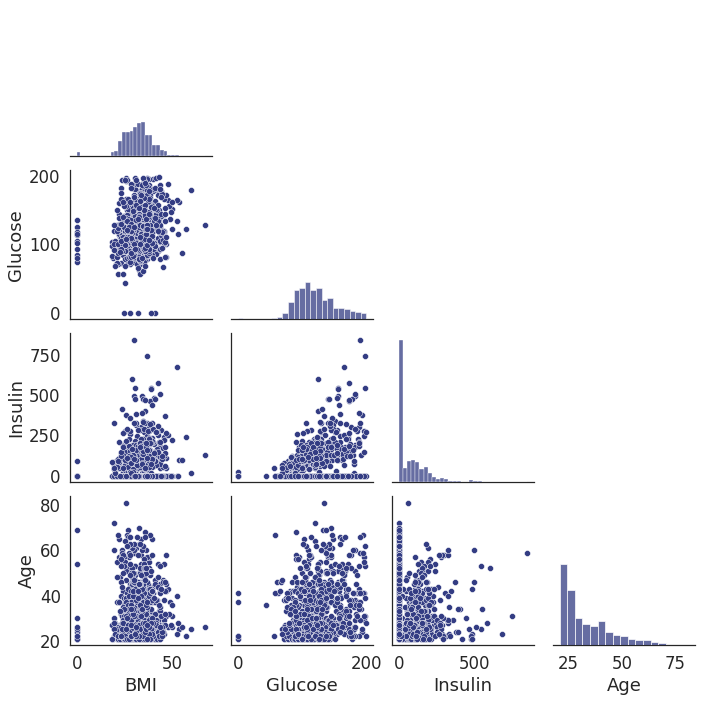

In [6]:
sns.pairplot(params, corner = True)

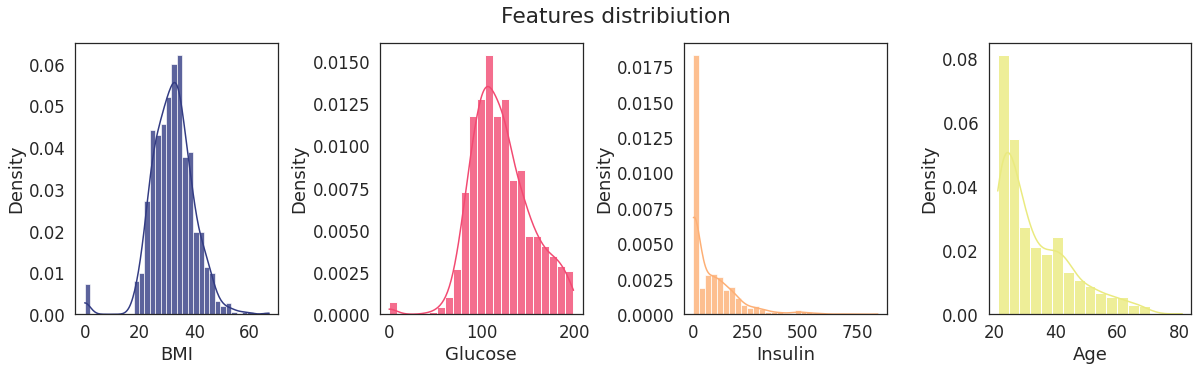

In [7]:
# distribiution plots more informativly:

fig, axes = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle('Features distribiution')
for column in params.columns:
  a = sns.histplot(ax=axes[dict_plot[column]],data=params, x=column, kde = True, stat = "density", color =pallete_dict[column],alpha =.8 )
plt.subplots_adjust(hspace = .5,wspace=.5) #adjust the borders between the graph


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


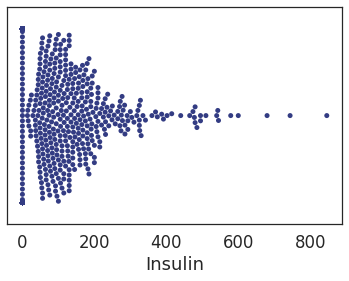

In [8]:
sns.swarmplot(params['Insulin'])

### 1.2 Are there any unusual features of the data that may affect downstream association analysis?  
### If there are, process the data to resolve these issues.

As we can see, there are some interesting issues:
1. The insulin parameter have a lot of zeros! 
Insulin at the level of 0 indicates a condition of type 1 diabetes. According to a google search, type 1 diabetes is common in about 10% of the population. The results can be interpreted in 2 ways:
  1. Our data does not represent the population because it has a high percentage of diabetics.
  2. The zeros are for missing information.

  I am currently choosing the second option so we will delete all the values which are 0.

  ####  ⚠ **Maybe we delete also important data here!**

1. The **variable "Age" is not normally distributed**. A large percentage of the samples are young people between the ages of 20-30. This should be taken into account when we want to concluse for the entire population.
3. There are zeros values in glucose and BMI parameters which is not make sense.

Lets create new df and delete all the 0 values. Then we check again the correlations and distrbiution:

In [9]:
params_clear = params[params>0]
# params_clear = params_clear.dropna()

In [10]:
params_clear.describe()

,BMI,Glucose,Insulin,Age
count,757.000000,763.000000,394.000000,768.000000
mean,32.457464,121.686763,155.548223,33.240885
std,6.924988,30.535641,118.775855,11.760232
min,18.200000,44.000000,14.000000,21.000000
25%,27.500000,99.000000,76.250000,24.000000
50%,32.300000,117.000000,125.000000,29.000000
75%,36.600000,141.000000,190.000000,41.000000
max,67.100000,199.000000,846.000000,81.000000


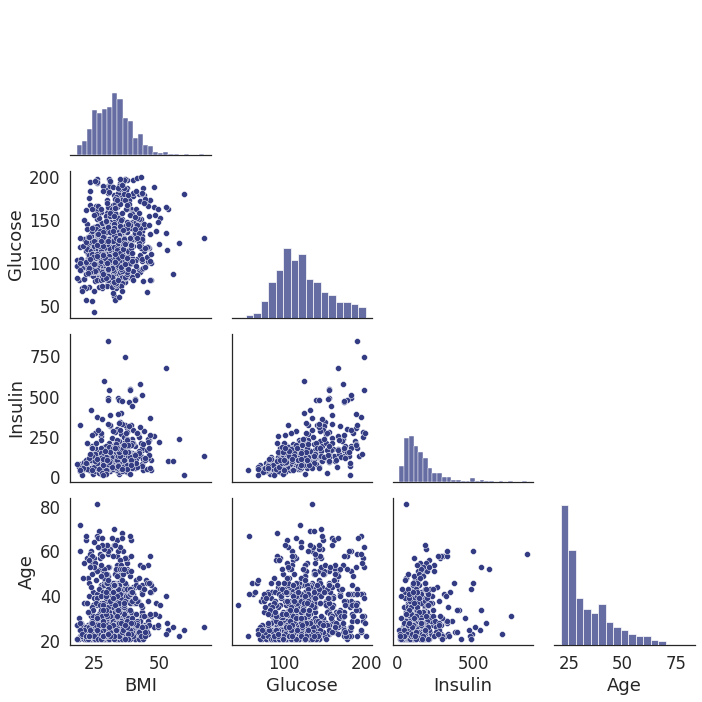

In [11]:
sns.pairplot(params_clear, corner = True)

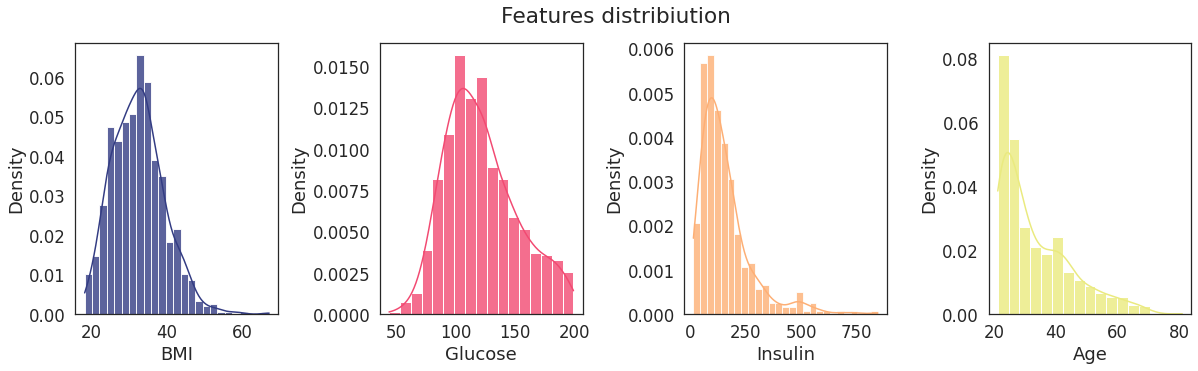

In [12]:
# distribiution plots mmore informativly:

fig, axes = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle('Features distribiution')
for column in params_clear.columns:
  a = sns.histplot(ax=axes[dict_plot[column]],data=params_clear, x=column, kde = True, stat = "density", color =pallete_dict[column],alpha =.8 )
plt.subplots_adjust(hspace = .5,wspace=.5) #adjust the borders between the graph

Now we can see that all the parameters (except Age) are close to be normal. Insulin distribiution has also peak around 500.

### 1.3 Glucose and Insulin seem to be positively correlated.  
### Quantify the correlation and between these variables and its statistical significance.  
### Which correlation did you choose to use? Why?(e.g. Pearson or Spearman)  

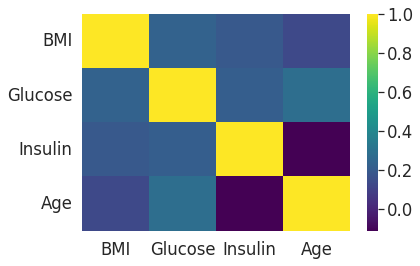

In [13]:
# lets first visualizate all the parameters correlation:
spearman_corr = params.corr(method='spearman')
sns.heatmap(spearman_corr,
           cmap='viridis')

I will choose **Spearman correlation** because its more general and not just linear correlacion.

 In addition its looks like the correlation can be exponential and not linear so spearman is better choise for this kind of correlation (which tests a monotonic rather than a linear relationship). We will assume that this parameters are normally distributed (as we have seen in graphs) so we can use build-in st

In [14]:
# statpy can't work with Nan values so we will drop them
# just for the ccoraletion to not loose data:
notna = params_clear.dropna()

In [15]:
# calculate spearman's correlation
coef, p = spearmanr(notna.Insulin, notna.Glucose)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Insulin & Glucose are uncorrelated (fail to reject H0) p=%.5f' % p)
else:
	print('Insulin & Glucose are correlated (reject H0) p=%.5f' % p)

Spearmans correlation coefficient: 0.659
Insulin & Glucose are correlated (reject H0) p=0.00000


### 1.4 Now quantify the correlation between BMI and Age and its statistical significance. 
### Based on your results, can we say that aging causes BMI to increase?

In [16]:
# calculate spearman's correlation
coef, p = spearmanr(notna.BMI, notna.Age)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('BMI & Age are uncorrelated (fail to reject H0) p=%.5f' % p)
else:
	print('BMI & Age are correlated (reject H0) p=%.5f' % p)

Spearmans correlation coefficient: 0.167
BMI & Age are correlated (reject H0) p=0.00091


As we can see from the results BMI & Age are correlated but it a not so strong correlation.

Even if we had a strong and perfect correlation it is still **not possible to draw conclusions about causality!**

*** 

## 2. Regressing (continous) variables

### 2.1 Perform a linear regression of BMI against Age (i.e. BMI = intercept + slope*Age) 
### What are the regression's slope and intercept?

In [17]:
x = params_clear['Age']
y = params_clear['BMI']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values

slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope_BMI_Age = slope 
r2 =  round(r_value**2,3)
r= 'R$^2$:', r2
print( "the linear model is: BMI = ",round(slope,3),"*Age +",round(intercept,2))
print(f"slope = {round(slope,3)},intercept = {round(intercept,3)}" )

the linear model is: BMI =  0.015 *Age + 31.95
slope = 0.015,intercept = 31.948


### 2.2 Generate a scatter plot of the data and the regression line

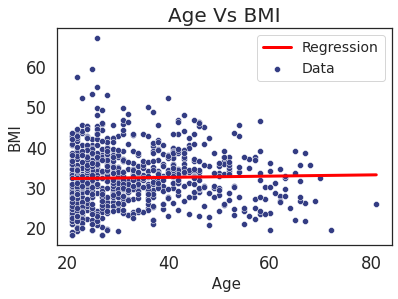

In [18]:
fig, ax = plt.subplots(1, figsize=(6,4))
# scatter
ax = sns.scatterplot(x=x[mask], y=y[mask],label = "Data")
# Regression line:
ax = sns.lineplot(x=x[mask], y=x[mask]*slope+intercept,color = "red",lw = 3, label = "Regression")


ax.set_xlabel(" Age",fontsize=15)
ax.set_ylabel("BMI",fontsize=15)
ax.set_title("Age Vs BMI",fontsize=20)
plt.legend(fontsize = 14)

### 2.3 Now we want to use a permutation test to test the null hypothesis that the slope is 0. 
### To generate data corresponding to the null hypothesis, we can permute one variable with respect to the other. 
### Implement such a test using the slope as the test statistic (magnitude of effect). 
### What is the resulting p-value?

In [19]:
# function for permutation test :
def permutation(
                x,
                y,
                MOE,
                runs = 1000
                ):
    """ perform a permutation test on the given dataframes """
    # Pool variables into a single distribution :
    pooled = np.concatenate((x,y))

    # Construct a simulated sampling distribution :
    sample_size_1 = len(x)
    sample_size_2 = len(y)
    slopes = np.zeros(runs)

    for i in range(runs):
        np.random.shuffle(pooled)
        sample_1 = pooled[:sample_size_1]
        sample_2 = pooled[-sample_size_2:]
    # calculate the slope each iteration:
        slope, intercept, r_value, p_value, std_err = stats.linregress(sample_1,sample_2)
        slopes[i] = slope       
    # compute our p-value :
    # we want the probabilty to get slopes that equal or bigger than our MOE(slope) :
    larger = np.where(slopes>= MOE, 1, 0)
    p_val = np.sum( larger ) / runs

    return slopes,p_val

In [20]:
slopes,p_val = permutation(x = notna['Age'].values,y = notna['BMI'].values,MOE = slope_BMI_Age)
print(f"p value = {p_val}, so we can't reject H0")

p value = 0.385, so we can't reject H0


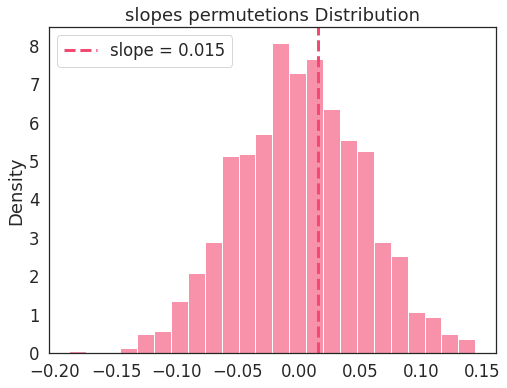

In [21]:
# graph
fig, ax = plt.subplots(1, figsize=(8,6))
ax = sns.histplot(x=slopes, stat = "density", color ="#F24A72",alpha =.6)
plt.axvline(x=slope_BMI_Age, color="#F24A72",ls='--',lw=3,label = f"slope = {round(slope_BMI_Age,3)}")
ax.set_title("slopes permutetions Distribution")
plt.legend(loc='best')

### (BONUS) 2.4 Perform two additional regressions:
- Insulin against Glucose (i.e. Insulin = intercept + slope*Glucose) 
- Glucose against Insulin (i.e. Glucose = intercept + slope*Insulin)

Plot the data and both regression lines on the same graph.  
Does the regression line depend on the variable order? Does the correlation? Why?

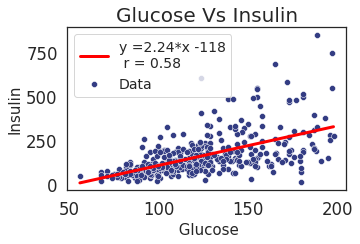

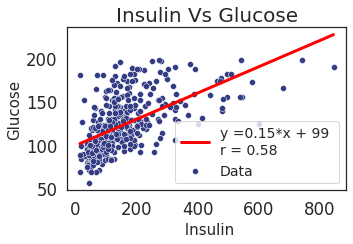

In [22]:
x = params_clear['Glucose']
y = params_clear['Insulin']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values

slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope_Insulin_Glucose = slope 
fig, ax = plt.subplots(1, figsize=(5,3))
# scatter
ax = sns.scatterplot(x=x[mask], y=y[mask],label = "Data")
# Regression line:
ax = sns.lineplot(x=x[mask], y=x[mask]*slope+intercept,color = "red",lw = 3,
                  label = f"y ={round(slope,2)}*x {int(intercept)}\n r = {round(r_value,2)}")
ax.set_xlabel(" Glucose",fontsize=15)
ax.set_ylabel("Insulin",fontsize=15)
ax.set_title("Glucose Vs Insulin",fontsize=20)
plt.legend(fontsize = 14)

x = params_clear['Insulin']
y = params_clear['Glucose']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope_Insulin_Glucose = slope 

fig, ax = plt.subplots(1, figsize=(5,3))
# scatter
ax = sns.scatterplot(x=x[mask], y=y[mask],label = "Data")
# Regression line:
ax = sns.lineplot(x=x[mask], y=x[mask]*slope+intercept,color = "red",lw = 3,
                  label = f"y ={round(slope,2)}*x + {int(intercept)} \nr = {round(r_value,2)}")


ax.set_xlabel(" Insulin",fontsize=15)
ax.set_ylabel("Glucose",fontsize=15)
ax.set_title("Insulin Vs Glucose",fontsize=20)
plt.legend(fontsize = 14)

1. The regression line is depend on the variable order as we can see the slopes and interceps are different when we change the order. 

  Its of course because the units and distribiution of X and y are different so the slope and intercepts are different when we exchange them.

2. The correlation didn't change because when we look on the eqution of the pearson's correlation its clear that when we exchange x and y the results will stay the same:

##  $r_{(pearson)} = \frac{\sum(x-\hat{x})(y-\hat{y})}{\sum(x-\hat{x})^2\sum(y-\hat{y})^2}$


### (Bonus) 2.5 If we get two different regression lines, how can we resolve that issue?  
> There is no need to actually calculate anything. Just explain what you would do.

If we will normelize the x and y values they will fit without their units and then the intercept and slope will be equal.

We can do it by standard our data while each value in column (Age/MBI) will be equal to:

  # $$x = \frac{x-\hat{x}}{\sigma}$$

  while:

  ### $x$ = *value*

  ### $\hat{x}=$ *averege of column*

  ### $\sigma = $ *std of column*





In [23]:
#define predictor variable columns
df_x = params_clear[['BMI', 'Age']]
#standardize the values for each predictor variable
df_x = (df_x-df_x.mean())/df_x.std()

Now lets apply linear regression 2 times:

1. $X$ = AGE, $Y =$ BMI
2. $X$ = BMI, $Y =$ AGE

If the slope and intercept will be equal it means that we correct...

In [24]:
# X  =  AGE ,  Y=   BMI
x = df_x['Age']
y = df_x['BMI']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values

slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope_BMI_Age = slope 
print( "the linear model is: BMI = ",round(slope,3),"*Age +",round(intercept,2))
print(f"slope = {round(slope,3)},intercept = {round(intercept,3)}" )

print("\nLets exchange x and y:")
# X  =  BMI ,  Y=   AGE
x = df_x['BMI']
y = df_x['Age']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope_BMI_Age = slope 

print( "\nthe linear model is: AGE = ",round(slope,3),"*BMI +",round(intercept,2))
print(f"slope = {round(slope,3)},intercept = {round(intercept,3)}" )

the linear model is: BMI =  0.026 *Age + -0.0
slope = 0.026,intercept = -0.0

Lets exchange x and y:

the linear model is: AGE =  0.026 *BMI + 0.0
slope = 0.026,intercept = 0.003


### Great! the slope and intercept are almost equal 🙂